In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


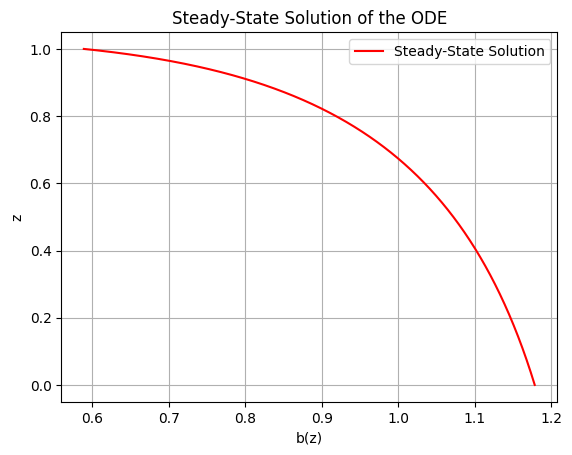

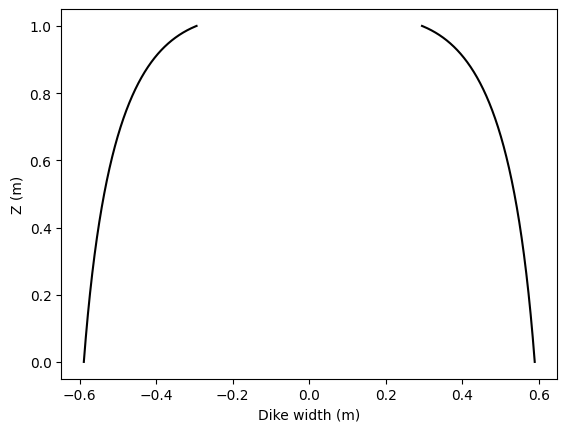

In [2]:
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt


def steady_state_ode(
    H: float, Nz: float, alpha: float, beta: float, Q: float, b_B: float
) -> tuple[jnp.ndarray, jnp.ndarray]:
    z = jnp.linspace(0, H, Nz)
    dz = z[1] - z[0]
    b = jnp.zeros(Nz)
    b = b.at[0].set(b_B)
    for i in range(Nz - 1):
        dbdz = (alpha / beta) - (Q / (beta * b[i] ** 3))
        b = b.at[i + 1].set(b[i] + dz * dbdz)

    return b, z


def plot_steady_state(b, z):
    # plt.figure(figsize=(6, 8))
    plt.plot(b, z, label="Steady-State Solution", color="blue")
    plt.xlabel("b(z)")
    plt.ylabel("z")
    plt.title("Steady-State Solution of the ODE")
    plt.grid()
    plt.legend()
    plt.show()

    # plt.figure(figsize=(6, 8))
    plt.plot(b / 2, z)
    plt.plot(-b / 2, z)
    plt.xlabel("x")
    plt.ylabel("z")
    plt.title("Cross-Sectional View")
    plt.show()


if __name__ == "__main__":
    H = 1.0
    Nz = 1001
    alpha = 0.4709
    beta = 1.0
    Q = 0.99
    b_B = 1.178164343

    b, z = steady_state_ode(H, Nz, alpha, beta, Q, b_B)
    b1, z1 = steady_state_ode(H, 1000, alpha, beta, Q, b_B)
    #plot_steady_state(b, z)
   # plt.plot(b, z, label="Steady-State Solution", color="blue")
    plt.plot(b1, z1, label="Steady-State Solution", color="red")
    plt.xlabel("b(z)")
    plt.ylabel("z")
    plt.title("Steady-State Solution of the ODE")
    plt.grid()
    plt.legend()
    plt.show()
    plt.plot(b1 / 2, z1,color="black")
    plt.plot(-b1 / 2, z1,color="black")
    plt.xlabel("Dike width (m)")
    plt.ylabel("Z (m)")
    #plt.savefig("/content/drive/MyDrive/steadystate.jpg",format="jpg",dpi=1000)
    plt.show()

In [ ]:
def transient_solution(H, Nz, alpha, beta, b_B, T, bT):
    dz = H / (Nz - 1)
    z = np.linspace(0, H, Nz)

    dt=(1)*(1/(3*alpha/dz +(2*beta)/dz**2))
    Nt=int(T/dt)

    b = np.zeros((Nt, Nz))
    b[0, :] = bT

    for n in range(Nt - 1):
        b3 = b[n, :] ** 3

        convection = ((alpha * dt) / dz) * (b3[1:] - b3[:-1])
        diffusion = ((beta * dt) / dz**2) * (
            ((b3[2:] + b3[1:-1]) / 2) * (b[n, 2:] - b[n, 1:-1])
            - ((b3[1:-1] + b3[:-2]) / 2) * (b[n, 1:-1] - b[n, :-2])
        )

        b[n + 1, 1:-1] = b[n, 1:-1] - convection[1:] + diffusion
        b[n + 1, 0] = b_B
        b[n + 1, -1] = bT

    print("Final time:", Nt * dt)
    print(f"dt{dt}")
    return b, z

Final time: 0.05
Final time: 0.1
Final time: 0.2
Final time: 0.5
Final time: 1.0
Final time: 2.0


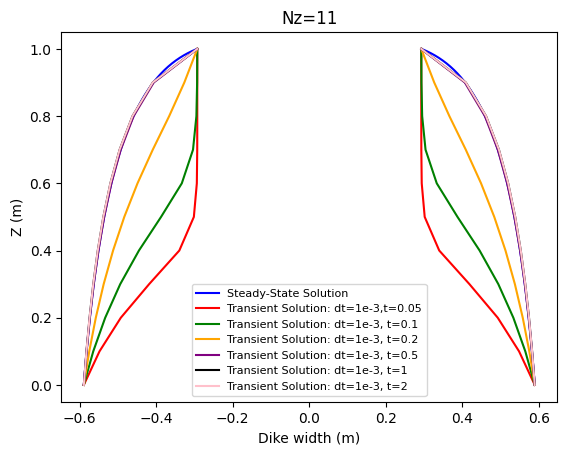

In [45]:
def transient_solution(H, Nz, alpha, beta, b_B, Nt, bT, dt):
    dz = H / (Nz - 1)
    z = np.linspace(0, H, Nz)
    b = np.zeros((Nt, Nz))
    b[0, :] = bT


    for n in range(Nt - 1):
        b3 = b[n, :] ** 3

        convection = ((alpha * dt) / dz) * (b3[1:] - b3[:-1])
        diffusion = ((beta * dt) / dz**2) * (
            ((b3[2:] + b3[1:-1]) / 2) * (b[n, 2:] - b[n, 1:-1])
            - ((b3[1:-1] + b3[:-2]) / 2) * (b[n, 1:-1] - b[n, :-2])
        )

        b[n + 1, 1:-1] = b[n, 1:-1] - convection[1:] + diffusion
        b[n + 1, 0] = b_B
        b[n + 1, -1] = bT

    print("Final time:", Nt * dt)
    return b, z


if __name__ == "__main__":
    H = 1.0
    Nz = 11
    alpha = 0.4709
    beta = 1.0
    Q = 0.99
    b_B = 1.178164343
    Nt = 10000

    bT = 0.5853

    b, z = transient_solution(H, Nz, alpha, beta, b_B, 50, bT,dt = 0.001)
    b01, z01 = transient_solution(H, Nz, alpha, beta, b_B, 100, bT,dt = 0.001)
    b02, z02 = transient_solution(H, Nz, alpha, beta, b_B, 200, bT,dt = 0.001)
    b05, z05 = transient_solution(H, Nz, alpha, beta, b_B, 500, bT,dt = 0.001)
    b1, z1 = transient_solution(H, Nz, alpha, beta, b_B, 1000, bT,dt = 0.001)
    b2, z2 = transient_solution(H, Nz, alpha, beta, b_B, 2000, bT,dt = 0.001)


    bsteady, zs = steady_state_ode(H, 1501, alpha, beta, Q, b_B)
    plt.plot(bsteady/2,zs,label="Steady-State Solution", color="blue")
    plt.plot(-bsteady/2,zs, color="blue")
    plt.plot(b[-1, :]/2, np.linspace(0, H, Nz),label="Transient Solution: dt=1e-3,t=0.05", color="red")
    plt.plot(-b[-1, :]/2, np.linspace(0, H, Nz), color="red")

    plt.plot(b01[-1, :]/2, np.linspace(0, H, Nz),label="Transient Solution: dt=1e-3, t=0.1", color="green")
    plt.plot(-b01[-1, :]/2, np.linspace(0, H, Nz), color="green")

    plt.plot(b02[-1, :]/2, np.linspace(0, H, Nz),label="Transient Solution: dt=1e-3, t=0.2", color="orange")
    plt.plot(-b02[-1, :]/2, np.linspace(0, H, Nz), color="orange")


    plt.plot(b05[-1, :]/2, np.linspace(0, H, Nz),label="Transient Solution: dt=1e-3, t=0.5", color="purple")
    plt.plot(-b05[-1, :]/2, np.linspace(0, H, Nz), color="purple")

    plt.plot(b1[-1, :]/2, np.linspace(0, H, Nz),label="Transient Solution: dt=1e-3, t=1", color="black")
    plt.plot(-b1[-1, :]/2, np.linspace(0, H, Nz), color="black")

    plt.plot(b2[-1, :]/2, np.linspace(0, H, Nz),label="Transient Solution: dt=1e-3, t=2", color="pink")
    plt.plot(-b2[-1, :]/2, np.linspace(0, H, Nz), color="pink")
    plt.xlabel("Dike width (m)")
    plt.ylabel("Z (m)")
    plt.legend(fontsize="8")
    plt.title("Nz=11")
    plt.savefig("/content/drive/MyDrive/transientNz11.png",format="png",dpi=1000)
    plt.show()


Final time: 0.05
Final time: 0.1
Final time: 0.2
Final time: 0.5
Final time: 1.0
Final time: 2.0


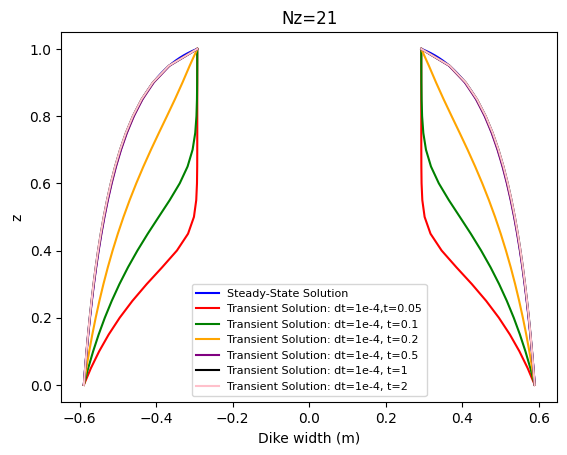

In [ ]:
if __name__ == "__main__":
    H = 1.0
    Nz = 21
    alpha = 0.4709
    beta = 1.0
    Q = 0.99
    b_B = 1.178164343
    Nt = 10000

    bT = 0.5853

    b, z = transient_solution(H, Nz, alpha, beta, b_B, 500, bT,dt = 0.0001)
    b01, z01 = transient_solution(H, Nz, alpha, beta, b_B, 1000, bT,dt = 0.0001)
    b02, z02 = transient_solution(H, Nz, alpha, beta, b_B, 2000, bT,dt = 0.0001)
    b05, z05 = transient_solution(H, Nz, alpha, beta, b_B, 5000, bT,dt = 0.0001)
    b1, z1 = transient_solution(H, Nz, alpha, beta, b_B, 10000, bT,dt = 0.0001)
    b2, z2 = transient_solution(H, Nz, alpha, beta, b_B, 20000, bT,dt = 0.0001)


    bsteady, zs = steady_state_ode(H, 1501, alpha, beta, Q, b_B)


    plt.plot(bsteady/2,zs,label="Steady-State Solution", color="blue")
    plt.plot(-bsteady/2,zs, color="blue")


    plt.plot(b[-1, :]/2, np.linspace(0, H, Nz),label="Transient Solution: dt=1e-4,t=0.05", color="red")
    plt.plot(-b[-1, :]/2, np.linspace(0, H, Nz), color="red")

    plt.plot(b01[-1, :]/2, np.linspace(0, H, Nz),label="Transient Solution: dt=1e-4, t=0.1", color="green")
    plt.plot(-b01[-1, :]/2, np.linspace(0, H, Nz), color="green")

    plt.plot(b02[-1, :]/2, np.linspace(0, H, Nz),label="Transient Solution: dt=1e-4, t=0.2", color="orange")
    plt.plot(-b02[-1, :]/2, np.linspace(0, H, Nz), color="orange")

    plt.plot(b05[-1, :]/2, np.linspace(0, H, Nz),label="Transient Solution: dt=1e-4, t=0.5", color="purple")
    plt.plot(-b05[-1, :]/2, np.linspace(0, H, Nz), color="purple")

    plt.plot(b1[-1, :]/2, np.linspace(0, H, Nz),label="Transient Solution: dt=1e-4, t=1", color="black")
    plt.plot(-b1[-1, :]/2, np.linspace(0, H, Nz), color="black")

    plt.plot(b2[-1, :]/2, np.linspace(0, H, Nz),label="Transient Solution: dt=1e-4, t=2", color="pink")
    plt.plot(-b2[-1, :]/2, np.linspace(0, H, Nz), color="pink")
    plt.xlabel("Dike width (m)")
    plt.ylabel("z")
    plt.legend(fontsize="8")
    plt.title("Nz=21")
    plt.savefig("/content/drive/MyDrive/transientNz21.png",format="png",dpi=1000)
    plt.show()

Final time: 0.05
Final time: 0.1
Final time: 0.2
Final time: 0.5
Final time: 1.0
Final time: 2.0


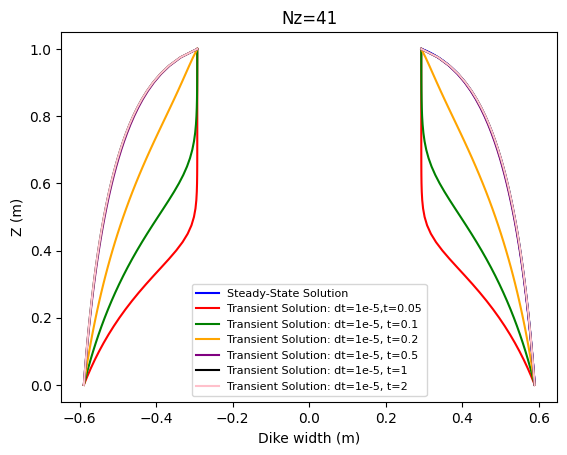

In [ ]:
if __name__ == "__main__":
    H = 1.0
    Nz = 41
    alpha = 0.4709
    beta = 1.0
    Q = 0.99
    b_B = 1.178164343
    Nt = 10000

    bT = 0.5853

    b, z = transient_solution(H, Nz, alpha, beta, b_B, 5000, bT,dt = 0.00001)
    b01, z01 = transient_solution(H, Nz, alpha, beta, b_B, 10000, bT,dt = 0.00001)
    b02, z02 = transient_solution(H, Nz, alpha, beta, b_B, 20000, bT,dt = 0.00001)
    b05, z05 = transient_solution(H, Nz, alpha, beta, b_B, 50000, bT,dt = 0.00001)
    b1, z1 = transient_solution(H, Nz, alpha, beta, b_B, 100000, bT,dt = 0.00001)
    b2, z2 = transient_solution(H, Nz, alpha, beta, b_B, 200000, bT,dt = 0.00001)


    bsteady, zs = steady_state_ode(H, 1501, alpha, beta, Q, b_B)
    plt.plot(bsteady/2,zs,label="Steady-State Solution", color="blue")
    plt.plot(bsteady/2,zs, color="blue")


    plt.plot(b[-1, :]/2, np.linspace(0, H, Nz),label="Transient Solution: dt=1e-5,t=0.05", color="red")
    plt.plot(-b[-1, :]/2, np.linspace(0, H, Nz),color="red")

    plt.plot(b01[-1, :]/2, np.linspace(0, H, Nz),label="Transient Solution: dt=1e-5, t=0.1", color="green")
    plt.plot(-b01[-1, :]/2, np.linspace(0, H, Nz),color="green")

    plt.plot(b02[-1, :]/2, np.linspace(0, H, Nz),label="Transient Solution: dt=1e-5, t=0.2", color="orange")
    plt.plot(-b02[-1, :]/2, np.linspace(0, H, Nz),color="orange")

    plt.plot(b05[-1, :]/2, np.linspace(0, H, Nz),label="Transient Solution: dt=1e-5, t=0.5", color="purple")
    plt.plot(-b05[-1, :]/2, np.linspace(0, H, Nz),color="purple")

    plt.plot(b1[-1, :]/2, np.linspace(0, H, Nz),label="Transient Solution: dt=1e-5, t=1", color="black")
    plt.plot(-b1[-1, :]/2, np.linspace(0, H, Nz),color="black")

    plt.plot(b2[-1, :]/2, np.linspace(0, H, Nz),label="Transient Solution: dt=1e-5, t=2", color="pink")
    plt.plot(-b2[-1, :]/2, np.linspace(0, H, Nz),color="pink")
    plt.xlabel("Dike width (m)")
    plt.ylabel("Z (m)")
    plt.legend(fontsize="8")
    plt.title("Nz=41")
    plt.savefig("/content/drive/MyDrive/transientNz41.png",format="png",dpi=1000)

    plt.show()

In [ ]:
bhighres, zhighres = steady_state_ode(H, 1001, alpha, beta, Q, b_B)
bnz11, znz11 = transient_solution(H, 11, alpha, beta, b_B, 200000, bT,dt = 0.00001)

bnz21, znz21 = transient_solution(H, 21, alpha, beta, b_B, 200000, bT,dt = 0.00001)

bnz41, znz41 = transient_solution(H, 41, alpha, beta, b_B, 200000, bT,dt = 0.00001)

Final time: 2.0
Final time: 2.0
Final time: 2.0


In [ ]:
def stride(Nx,Nx1):
  stride = (Nx - 1) // (Nx1 - 1)

  return stride

highress11=bhighres[::stride(1001,11)]
highress21=bhighres[::stride(1001,21)]
highress41=bhighres[::stride(1001,41)]

e11=highress11-bnz11[-1,]
e21=highress21-bnz21[-1,]
e41=highress41-bnz41[-1,]


11
21
41


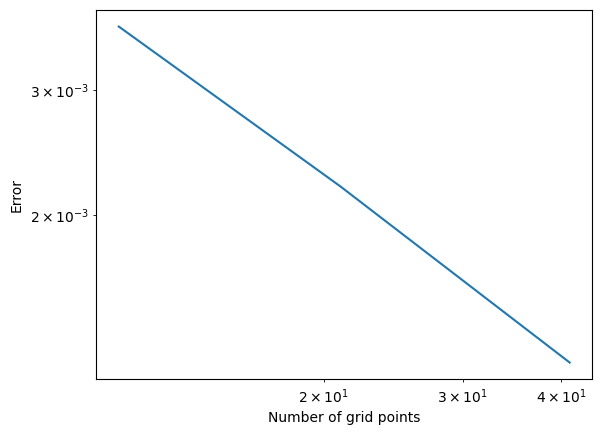

In [ ]:
def composite_trap(err):
    N = len(err)
    print(N)
    h = 1 / (N - 1)
    summation = (err[0]**2 + 2*np.sum(err[1:-1]**2) + err[-1]**2) * (h / 2)
    return np.sqrt(summation)

error11=composite_trap(e11)
error21=composite_trap(e21)
error41=composite_trap(e41)

plt.plot([11,21,41],[error11,error21,error41])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of grid points")
plt.ylabel("Error")
plt.show()

Grad: 0.80


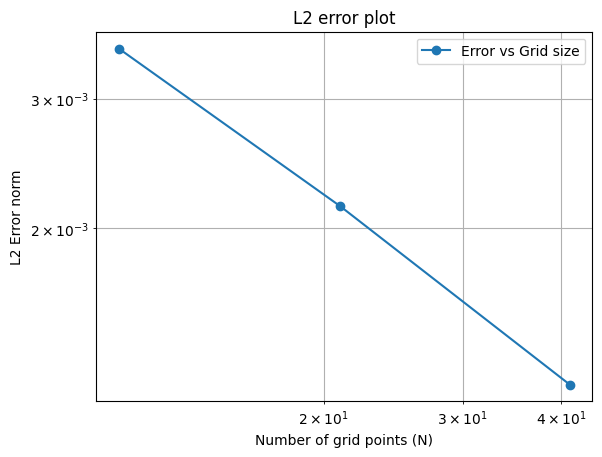

In [ ]:


def composite_trap(err):
    h = 1 / len(err)
    summation = (2 * np.sum(err[1:-1]**2) + err[0]**2 + err[-1]**2) * (h / 2)
    return np.sqrt(summation)

error11 = composite_trap(e11)
error21 = composite_trap(e21)
error41 = composite_trap(e41)

N = np.array([11, 21, 41])
errors = np.array([error11, error21, error41])

plt.loglog(N, errors, "o-", label="Error vs Grid size")
plt.xlabel("Number of grid points (N)")
plt.ylabel("L2 Error norm")
plt.title("L2 error plot")
plt.legend()
plt.grid(True, which="both")

slope, intercept = np.polyfit(np.log(N), np.log(errors), 1)
print(f"Grad: {abs(slope):.2f}")
plt.savefig("/content/drive/MyDrive/errorplot.png",format="png",dpi=1000)

plt.show()


In [34]:
def transient_solution(
    H: float, Nz: int, alpha: float, beta: float, b_B: float, Nt: int, bT: float,dt:float
) -> tuple[np.ndarray, np.ndarray]:
    z = np.zeros((Nt, Nz))
    b = np.zeros((Nt, Nz))

    b[0, :] = bT

    dz = H / (Nz - 1)
    time = 0


    for n in range(Nt - 1):
        for i in range(1, Nz - 1):
            convection = ((alpha * dt) / dz) * (b[n, i] ** 3 - b[n, i - 1] ** 3)
            diffusion = ((beta * dt) / dz**2) * (
                ((b[n, i + 1] ** 3 + b[n, i] ** 3) / 2) * (b[n, i + 1] - b[n, i])
                - ((b[n, i] ** 3 + b[n, i - 1] ** 3) / 2) * (b[n, i] - b[n, i - 1])
            )

            b[n + 1, i] = b[n, i] - convection + diffusion
        b[n + 1, 0] = b_B
        b[n + 1, -1] = bT
        time += dt

    print("Final time:", time)

    return b, z

In [ ]:

alpha = 0.4709
beta  = 1.0
c     = 0.4709
zr0   = 0.9

ntimes = 3
dt = 0.001
b = np.linspace(0, 1, 101)
g = int(ntimes / dt)

zs = np.zeros((g, len(b)))

for i in range(g):
    t = i * dt
    for j_idx, bj in enumerate(b):
        zs[i, j_idx] = (beta / alpha) * (bj - (np.sqrt(c / alpha) * np.atanh(np.sqrt(alpha / c) * bj))) + c * t + zr0

zs=np.maximum(zs,0)

bstead, zstead = transient_solution(3, 21, alpha, beta, 0.96, 30000,0,dt = 0.0001)
plt.plot(b, zs[-1, :])
plt.plot(-b,zs[-1, :])
plt.plot(bstead[-1, :],np.linspace(0,2.31,21))
plt.plot(-bstead[-1, :],np.linspace(0,2.31,21))

#plt.plot(-bstead,zstead)
plt.xlabel("b(z)")
plt.ylabel("z")
plt.show()
# b, z = transient_solution(H, Nz, alpha, beta, b_B, 50, bT,dt = 0.001)

print(zs[-1, :])
print(b)







/tmp/ipython-input-25025057.py:16: RuntimeWarning: divide by zero encountered in arctanh
  zs[i, j_idx] = (beta / alpha) * (bj - (np.sqrt(c / alpha) * np.atanh(np.sqrt(alpha / c) * bj))) + c * t + zr0


KeyboardInterrupt: 

/tmp/ipython-input-3488307764.py:11: RuntimeWarning: divide by zero encountered in arctanh
  zs[i, j_idx] = (beta / alpha) * (bj - (np.sqrt(c / alpha) * np.atanh(np.sqrt(alpha / c) * bj))) + c * t + zr0


0.007132943572788041
Final time: 0.9986121001903258


/tmp/ipython-input-3850885646.py:9: RuntimeWarning: overflow encountered in power
  b3 = b[n, :] ** 3
/tmp/ipython-input-3850885646.py:11: RuntimeWarning: invalid value encountered in subtract
  convection = ((alpha * dt) / dz) * (b3[1:] - b3[:-1])
/tmp/ipython-input-3850885646.py:13: RuntimeWarning: invalid value encountered in add
  ((b3[2:] + b3[1:-1]) / 2) * (b[n, 2:] - b[n, 1:-1])
/tmp/ipython-input-3850885646.py:13: RuntimeWarning: overflow encountered in multiply
  ((b3[2:] + b3[1:-1]) / 2) * (b[n, 2:] - b[n, 1:-1])
/tmp/ipython-input-3850885646.py:14: RuntimeWarning: invalid value encountered in add
  - ((b3[1:-1] + b3[:-2]) / 2) * (b[n, 1:-1] - b[n, :-2])
/tmp/ipython-input-3850885646.py:14: RuntimeWarning: overflow encountered in multiply
  - ((b3[1:-1] + b3[:-2]) / 2) * (b[n, 1:-1] - b[n, :-2])
/tmp/ipython-input-3850885646.py:13: RuntimeWarning: invalid value encountered in subtract
  ((b3[2:] + b3[1:-1]) / 2) * (b[n, 2:] - b[n, 1:-1])


0.012528903125612148
Final time: 1.9920955969723315
0.01923641747267244
Final time: 2.9816447082642283
0.027154548566981532
Final time: 3.9917186393462853


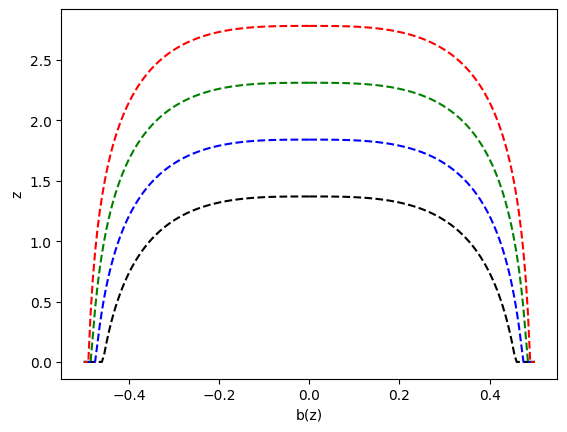

In [29]:
def exact_sol(t,alpha=0.4709,beta=1,c=0.4709,zr0=0.9): #0.9
  ntimes = t
  dt = 0.001
  b = np.linspace(0, 1, 101)
  g = int(ntimes / dt)

  zs = np.zeros((g, len(b)))
  for i in range(g):
    t = i * dt
    for j_idx, bj in enumerate(b):
      zs[i, j_idx] = (beta / alpha) * (bj - (np.sqrt(c / alpha) * np.atanh(np.sqrt(alpha / c) * bj))) + c * t + zr0

  zs=np.maximum(zs,0)

  return zs[-1, :],zs[-1, 0],b[-5]


colors=["black","blue","green","red"]
ts=[1,2,3,4]

for k, ti in enumerate(ts):



  z,Htop,bBottom = exact_sol(ti)
  dz=Htop/11
  convective_time= 1/((3.0*0.4709*1**2)/dz)
  diffusive_time = 1/((2.0*(1)**3)/(dz**2))
  dt=  (dz**2)/((3*alpha*dz) + 2*beta) #(1)*(1/(3*alpha/dz +(2*beta)/dz**2))

  print(dt)
  time=ti/dt
  tranb, tranz = transient_solution(Htop, 21, alpha, beta, bBottom, int(time),0,dt = dt)

  plt.plot(tranb[-1, :]/2,np.linspace(0,Htop,21),color=colors[k])
  plt.plot(-tranb[-1, :]/2,np.linspace(0,Htop,21),color=colors[k])
  plt.plot( np.linspace(0, 1, 101)/2,z,color=colors[k],linestyle="--")
  plt.plot(-np.linspace(0, 1, 101)/2,z,color=colors[k],linestyle="--")
plt.xlabel("b(z)")
plt.ylabel("z")
plt.show()


/tmp/ipython-input-3488307764.py:11: RuntimeWarning: divide by zero encountered in arctanh
  zs[i, j_idx] = (beta / alpha) * (bj - (np.sqrt(c / alpha) * np.atanh(np.sqrt(alpha / c) * bj))) + c * t + zr0


0.0020355101969693297
Final time: 0.9973999965149777
0.003619899813290395
Final time: 1.9945647971229952
0.005624263353132003
Final time: 2.992108103866203
0.008030353061300639
Final time: 3.9910854714664645


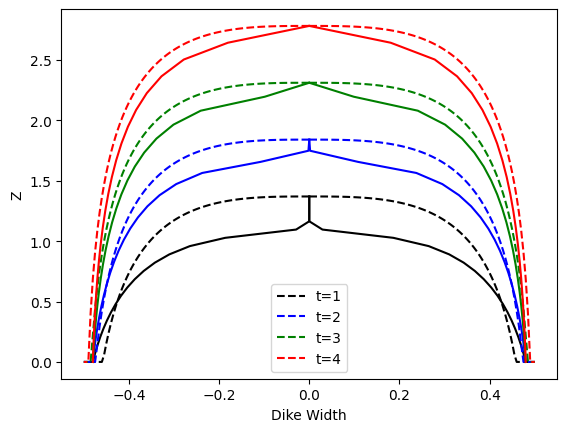

In [43]:
for k, ti in enumerate(ts):



  z,Htop,bBottom = exact_sol(ti)
  dz=Htop/21
  convective_time= 1/((3.0*0.4709*1**2)/dz)
  diffusive_time = 1/((2.0*(1)**3)/(dz**2))
  dt=  (1)*(1/(3*alpha/dz +(2*beta)/dz**2))

  print(dt)
  time=ti/dt
  tranb, tranz = transient_solution(Htop, 21, alpha, beta, bBottom, int(time),0,dt = dt)

  plt.plot(tranb[-1, :]/2,np.linspace(0,Htop,21),color=colors[k])
  plt.plot(-tranb[-1, :]/2,np.linspace(0,Htop,21),color=colors[k])
  plt.plot( np.linspace(0, 1, 101)/2,z,color=colors[k],linestyle="--",label=f"t={ti}")
  plt.plot(-np.linspace(0, 1, 101)/2,z,color=colors[k],linestyle="--")
plt.xlabel("Dike Width")
plt.ylabel("Z")
plt.legend()
plt.savefig("/content/drive/MyDrive/exacttransientNz21.png",format="png",dpi=1000)
plt.show()

/tmp/ipython-input-3488307764.py:11: RuntimeWarning: divide by zero encountered in arctanh
  zs[i, j_idx] = (beta / alpha) * (bj - (np.sqrt(c / alpha) * np.atanh(np.sqrt(alpha / c) * bj))) + c * t + zr0


0.0005457339744363007
Final time: 0.9992389071928184
0.0009774672590845254
Final time: 1.9989205448278813
0.0015293239962598276
Final time: 2.997475032669255
0.0021985143789670725
Final time: 3.996899140962011


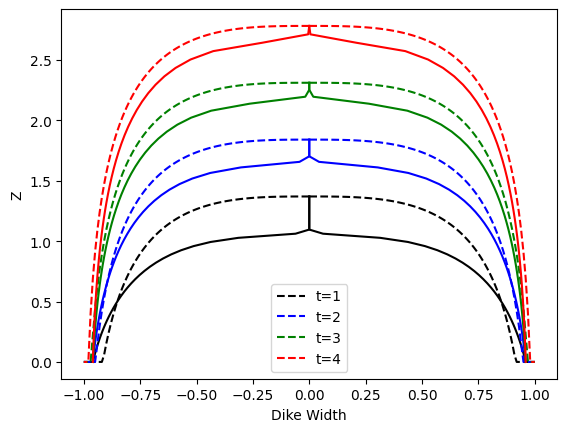

In [44]:

for k, ti in enumerate(ts):



  z,Htop,bBottom = exact_sol(ti)
  dz=Htop/41
  convective_time= 1/((3.0*0.4709*1**2)/dz)
  diffusive_time = 1/((2.0*(1)**3)/(dz**2))
  dt=  (1/((3*alpha/dz) +((2*beta)/dz**2)))

  print(dt)
  time=ti/dt
  tranb, tranz = transient_solution(Htop, 41, alpha, beta, bBottom, int(time),0,dt = dt)

  plt.plot(tranb[-1, :],np.linspace(0,Htop,41),color=colors[k])
  plt.plot(-tranb[-1, :],np.linspace(0,Htop,41),color=colors[k])
  plt.plot( np.linspace(0, 1, 101),z,color=colors[k],linestyle="--",label=f"t={ti}")
  plt.plot(-np.linspace(0, 1, 101),z,color=colors[k],linestyle="--")
plt.xlabel("Dike Width")
plt.ylabel("Z")
plt.legend()
plt.savefig("/content/drive/MyDrive/exacttransientNz41.png",format="png",dpi=1000)
plt.show()

/tmp/ipython-input-3488307764.py:11: RuntimeWarning: divide by zero encountered in arctanh
  zs[i, j_idx] = (beta / alpha) * (bj - (np.sqrt(c / alpha) * np.atanh(np.sqrt(alpha / c) * bj))) + c * t + zr0


9.117963771663345e-05
Final time: 0.9998759072007665
0.00016407151423532127
Final time: 1.9997036154997856
0.0002578827564852444
Final time: 2.999692223435893
0.00037241063114173815
Final time: 3.9993177678303224


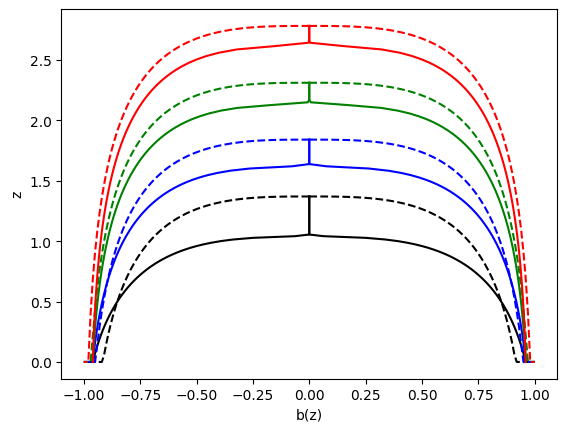

In [39]:
for k, ti in enumerate(ts):



  z,Htop,bBottom = exact_sol(ti)
  dz=Htop/101
  convective_time= 1/((3.0*0.4709*1**2)/dz)
  diffusive_time = 1/((2.0*(1)**3)/(dz**2))
  dt=  (1/((3*alpha/dz) +((2*beta)/dz**2)))

  print(dt)
  time=ti/dt
  tranb, tranz = transient_solution(Htop, 101, alpha, beta, bBottom, int(time),0,dt = dt)

  plt.plot(tranb[-1, :],np.linspace(0,Htop,101),color=colors[k])
  plt.plot(-tranb[-1, :],np.linspace(0,Htop,101),color=colors[k])
  plt.plot( np.linspace(0, 1, 101),z,color=colors[k],linestyle="--")
  plt.plot(-np.linspace(0, 1, 101),z,color=colors[k],linestyle="--")
plt.xlabel("b(z)")
plt.ylabel("z")
plt.show()